In [2]:
import torchio as tio
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import argparse
from models import *
from utilities import *

/Users/huayinluo/Documents/code/gapjncsegmentation/gapvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_z_y_x(file_name, pattern):
    """ get z, y, x from file name (uses basename of file_name)"""
    file_name = os.path.basename(file_name)
    match = re.match(pattern, file_name)
    if match:
        if len(match.groups()) != 3:
            return None
        z, y, x = match.groups()
        return int(z), int(y), int(x)
    else:
        return None

In [4]:
# gt_dir="/Volumes/LaCie/zhenlab/gjsegmentation/gj_test_datasets/100_110_3x512x512/ground_truth"
# img_dir="/Volumes/LaCie/zhenlab/gjsegmentation/gj_test_datasets/100_110_3x512x512/original"
# save_dir="/Volumes/LaCie/filtered_100_110_3x512x512"
gt_dir="/Volumes/LaCie/filtered_0_50_3x512x512/ground_truth/train"
img_dir="/Volumes/LaCie/filtered_0_50_3x512x512/original/train"
cellgt_dir="/Volumes/LaCie/filtered_0_50_3x512x512/cell_mask/train"
# save_dir="/Volumes/LaCie/filtered_100_110_3x512x512"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# if not os.path.exists(os.path.join(save_dir, "original", "train")):
#     os.makedirs(os.path.join(save_dir, "original", "train"), exist_ok=True)

# if not os.path.exists(os.path.join(save_dir, "ground_truth", "train")):
#     os.makedirs(os.path.join(save_dir, "ground_truth", "train"), exist_ok=True)
# if not os.path.exists(os.path.join(save_dir, "ground_truth", "valid")):
#     os.makedirs(os.path.join(save_dir, "ground_truth", "valid"), exist_ok=True)

In [5]:
img_paths = os.listdir(img_dir)
gt_paths = os.listdir(gt_dir)
cellmask_paths = os.listdir(cellgt_dir)
print(len(img_paths))
print(img_paths[:10])
print(gt_paths[:10])
print(cellmask_paths[:10])

1897
['z0_y4_x5.npy', 'z0_y6_x6.npy', 'z0_y6_x11.npy', 'z0_y6_x13.npy', 'z0_y7_x8.npy', 'z0_y7_x9.npy', 'z0_y7_x11.npy', 'z0_y7_x13.npy', 'z0_y7_x15.npy', 'z0_y8_x5.npy']
['z0_y4_x5.npy', 'z0_y6_x6.npy', 'z0_y6_x11.npy', 'z0_y6_x13.npy', 'z0_y7_x8.npy', 'z0_y7_x9.npy', 'z0_y7_x11.npy', 'z0_y7_x13.npy', 'z0_y7_x15.npy', 'z0_y8_x5.npy']
['z0_y4_x5.npy', 'z0_y6_x6.npy', 'z0_y6_x11.npy', 'z0_y6_x13.npy', 'z0_y7_x8.npy', 'z0_y7_x9.npy', 'z0_y7_x11.npy', 'z0_y7_x13.npy', 'z0_y7_x15.npy', 'z0_y8_x5.npy']


/Volumes/LaCie/filtered_0_50_3x512x512/cell_mask/train/z2_y10_x12.npy
(3, 512, 512)
(array([0, 1], dtype=uint8), array([ 13612, 248532]))


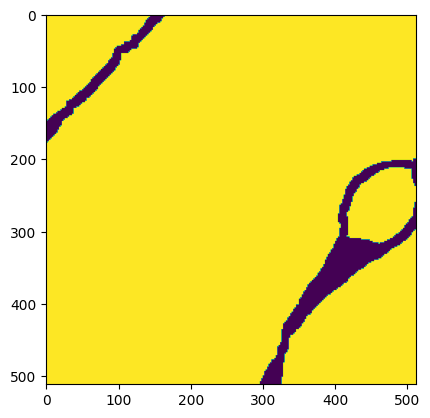

In [14]:
fp=os.path.join(cellgt_dir, cellmask_paths[100])
print(fp)
tmp=np.load(fp)
print(tmp.shape)
plt.imshow(tmp[0])
print(np.unique(tmp[0], return_counts=True))

In [9]:
num_imgs=len(img_paths)
num_valid = int(0.2*num_imgs)
indices = np.arange(num_imgs)
np.random.shuffle(indices)
valid_indices = indices[:num_valid]
print(len(valid_indices))
print(valid_indices[:10])
save_dir="/Volumes/LaCie/filtered_0_50_3x512x512"
if not os.path.exists(os.path.join(save_dir, "original", "valid")):
    os.makedirs(os.path.join(save_dir, "original", "valid"), exist_ok=True)
if not os.path.exists(os.path.join(save_dir, "ground_truth", "valid")):
    os.makedirs(os.path.join(save_dir, "ground_truth", "valid"), exist_ok=True)
if not os.path.exists(os.path.join(save_dir, "cell_mask", "valid")):
    os.makedirs(os.path.join(save_dir, "cell_mask", "valid"), exist_ok=True)
for i in range(len(valid_indices)):
    idx=valid_indices[i]
    print(f"moved {i}/{num_valid}")
    img_fp = img_paths[idx]
    gt_fp = gt_paths[idx]
    try:
        os.rename(os.path.join(save_dir, "original","train", img_fp), os.path.join(save_dir, "original","valid", img_fp))
        os.rename(os.path.join(save_dir, "ground_truth","train", gt_fp), os.path.join(save_dir, "ground_truth","valid", gt_fp))
        os.rename(os.path.join(save_dir, "cell_mask","train", gt_fp), os.path.join(save_dir, "cell_mask","valid", gt_fp))
    except:
        continue

539
[1362 2374  528 2592 1844 2243 1453  241 2030 1669]
moved 0/539
moved 1/539
moved 2/539
moved 3/539
moved 4/539
moved 5/539
moved 6/539
moved 7/539
moved 8/539
moved 9/539
moved 10/539
moved 11/539
moved 12/539
moved 13/539
moved 14/539
moved 15/539
moved 16/539
moved 17/539
moved 18/539
moved 19/539
moved 20/539
moved 21/539
moved 22/539
moved 23/539
moved 24/539
moved 25/539
moved 26/539
moved 27/539
moved 28/539
moved 29/539
moved 30/539
moved 31/539
moved 32/539
moved 33/539
moved 34/539
moved 35/539
moved 36/539
moved 37/539
moved 38/539
moved 39/539
moved 40/539
moved 41/539
moved 42/539
moved 43/539
moved 44/539
moved 45/539
moved 46/539
moved 47/539
moved 48/539
moved 49/539
moved 50/539
moved 51/539
moved 52/539
moved 53/539
moved 54/539
moved 55/539
moved 56/539
moved 57/539
moved 58/539
moved 59/539
moved 60/539
moved 61/539
moved 62/539
moved 63/539
moved 64/539
moved 65/539
moved 66/539
moved 67/539
moved 68/539
moved 69/539
moved 70/539
moved 71/539
moved 72/539
moved

#archive

In [38]:
import shutil
imgs=[]
gts=[]
num_saved = 0
for i in range(len(img_paths)):
    img_fp = img_paths[i]
    gt_fp = gt_paths[i]
    try:
        img = np.load(os.path.join(img_dir, img_fp))
        gt = np.load(os.path.join(gt_dir, gt_fp))
    except:
        continue
    suffix = os.path.splitext(img_fp)[0]
    print(f"Saved {suffix} | {i}/{len(img_paths)} | num saved {num_saved}", end="\r")
    depth = gt.shape[0]
    has_empty = False
    for k in range(depth):
        if len(np.unique(gt[k])) < 2:
            has_empty = True
    if not has_empty:
        np.save(os.path.join(save_dir, "original", "train", f"{suffix}.npy"), img)
        np.save(os.path.join(save_dir, "ground_truth", "train", f"{suffix}.npy"), gt)
        num_saved += 1

In [43]:
img_paths = os.listdir(os.path.join(save_dir, "original", "train"))
gt_paths = os.listdir(os.path.join(save_dir, "ground_truth", "train"))
print(len(img_paths))
print(img_paths[:10])
print(gt_paths[:10])

316
['z0_y1536_x3584.npy', 'z0_y1536_x4096.npy', 'z0_y1536_x4608.npy', 'z0_y2048_x2560.npy', 'z0_y2048_x3072.npy', 'z0_y2048_x3584.npy', 'z0_y2048_x4096.npy', 'z0_y2048_x4608.npy', 'z0_y2048_x5120.npy', 'z0_y2048_x6144.npy']
['z0_y1536_x3584.npy', 'z0_y1536_x4096.npy', 'z0_y1536_x4608.npy', 'z0_y2048_x2560.npy', 'z0_y2048_x3072.npy', 'z0_y2048_x3584.npy', 'z0_y2048_x4096.npy', 'z0_y2048_x4608.npy', 'z0_y2048_x5120.npy', 'z0_y2048_x6144.npy']


In [49]:
num_imgs=len(img_paths)
num_valid = int(0.2*num_imgs)
indices = np.arange(num_imgs)
np.random.shuffle(indices)
valid_indices = indices[:num_valid]
print(len(valid_indices))
print(valid_indices[:10])

63
[ 58 136 117 259  40 118 146 238 103 183]


In [50]:
save_dir="/Volumes/LaCie/filtered_100_110_3x512x512_backup"

In [51]:
for i in range(len(valid_indices)):
    idx=valid_indices[i]
    print(f"moved {i}/{num_valid}")
    img_fp = img_paths[idx]
    gt_fp = gt_paths[idx]
    os.rename(os.path.join(save_dir, "original","train", img_fp), os.path.join(save_dir, "original","valid", img_fp))
    os.rename(os.path.join(save_dir, "ground_truth","train", gt_fp), os.path.join(save_dir, "ground_truth","valid", gt_fp))

moved 0/63
moved 1/63
moved 2/63
moved 3/63
moved 4/63
moved 5/63
moved 6/63
moved 7/63
moved 8/63
moved 9/63
moved 10/63
moved 11/63
moved 12/63
moved 13/63
moved 14/63
moved 15/63
moved 16/63
moved 17/63
moved 18/63
moved 19/63
moved 20/63
moved 21/63
moved 22/63
moved 23/63
moved 24/63
moved 25/63
moved 26/63
moved 27/63
moved 28/63
moved 29/63
moved 30/63
moved 31/63
moved 32/63
moved 33/63
moved 34/63
moved 35/63
moved 36/63
moved 37/63
moved 38/63
moved 39/63
moved 40/63
moved 41/63
moved 42/63
moved 43/63
moved 44/63
moved 45/63
moved 46/63
moved 47/63
moved 48/63
moved 49/63
moved 50/63
moved 51/63
moved 52/63
moved 53/63
moved 54/63
moved 55/63
moved 56/63
moved 57/63
moved 58/63
moved 59/63
moved 60/63
moved 61/63
moved 62/63


In [ ]:


# -- args
start_x = 
start_y = 
start_z = 
ending_depth = 
ending_height = 
ending_width = 
subvol_depth = 
subvol_height = 
subvol_width = 
mask_dir= 
img_dir= 
save_dir=
if not os.path.exists(os.path.join(save_dir, "visualize")): 
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs(os.path.join(save_dir, "original"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "ground_truth"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "pred"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "visualize"), exist_ok=True)
    
# -- get imgs & mask fp
img_files = os.listdir(img_dir)
mask_files = os.listdir(mask_dir)
mask_pattern=r"sem_dauer_2_gj_gt_s(\d+).png"
img_pattern=r"SEM_dauer_2_em_s(\d+).png"
img_files = [os.path.join(img_dir, f) for f in img_files if f.endswith(".png")]
mask_files = [os.path.join(mask_dir, f) for f in mask_files if f.endswith(".png")]

# -- load model
fp=
model = UNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model, optimizer, epoch, loss, batch_size, lr, focal_loss_weights = load_checkpoint(model, optimizer, fp)
model = model.eval()
print("model loaded")

In [ ]:

# -- get masks:
i=0
for z in range(start_z, ending_depth):
    tmp_img = get_img_by_z(z, img_files, img_pattern)
    tmp_mask = get_img_by_z(z, mask_files, mask_pattern)
    if i == 0:
        h, w = tmp_img.shape[0], tmp_img.shape[1]
        full_volume_img = np.zeros((ending_depth-start_z, h, w))
        full_volume_mask = np.zeros((ending_depth-start_z, h, w))
        print("Created full img & mask", full_volume_img.shape, full_volume_mask.shape)
    full_volume_img[i] = tmp_img
    full_volume_mask[i] = tmp_mask
    i+=1
    print(f"done {z} z-slice")
print("full volume shape:", full_volume_img.shape, full_volume_mask.shape)

start_z = 0
# ending_depth = full_volume_img.shape[0]
if args.use_full_volume:
    ending_height = full_volume_img.shape[1]
    ending_width = full_volume_img.shape[2]
print("subvolume shape:", subvol_depth, subvol_height, subvol_width)
print("ending:", ending_depth, ending_height, ending_width)

step_z = args.step_z
step_y = args.step_y
step_x = args.step_x
while start_z < ending_depth:
    end_z = start_z + subvol_depth
    start_y = args.start_y
    while start_y < ending_height:
        end_y = start_y + subvol_height 
        start_x = args.start_x
        while start_x < ending_width:
            end_x = start_x + subvol_width
            sub_volume_img = full_volume_img[start_z:end_z, start_y:end_y, start_x:end_x]
            sub_volume_mask = full_volume_mask[start_z:end_z, start_y:end_y, start_x:end_x] # with confidence levels
            sub_vol_depth, sub_vol_height, sub_vol_width = sub_volume_img.shape
            image = torch.tensor(sub_volume_img).float().unsqueeze(0)
            if (sub_vol_height < subvol_height) or (sub_vol_width < subvol_width) or (sub_vol_depth < subvol_depth):
                image = tio.CropOrPad((subvol_depth, subvol_height, subvol_width))(image)
                
            try:
                image = tio.ZNormalization()(image)
                print(image.shape)
                intermed_pred, sub_volume_pred = model(image)
                binary_pred = torch.argmax(sub_volume_pred[0], dim=0) # (depth, height, width)
                np.save(os.path.join(save_dir, "original", f"z{start_z}_y{start_y}_x{start_x}.npy"), sub_volume_img)
                np.save(os.path.join(save_dir, "ground_truth", f"z{start_z}_y{start_y}_x{start_x}.npy"), sub_volume_mask)
                np.save(os.path.join(save_dir, "pred", f"z{start_z}_y{start_y}_x{start_x}.npy"), sub_volume_pred.detach().cpu())            
                fig, ax = plt.subplots(3, subvol_depth, figsize=(15,5), num=1)
                visualize_3d_slice(sub_volume_img, ax[0], "Image")
                visualize_3d_slice(sub_volume_mask, ax[1], "Mask")
                visualize_3d_slice(binary_pred, ax[2], "Pred")
                plt.savefig(os.path.join(save_dir, "visualize", f"z{start_z}_y{start_y}_x{start_x}.png"))
                plt.close("all")
                print(f"Saved z{start_z}-{end_z} y{start_y}-{end_y} x{start_x}-{end_x} subvolume")
            except:
                print(f"Skipping z{start_z}-{end_z} y{start_y}-{end_y} x{start_x}-{end_x}")
            start_x = start_x + step_x
        start_y = start_y + step_y
    start_z = start_z + step_z